In [1]:
import pandas as pd

In [8]:
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv')

In [9]:
df

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572
...,...,...
2900,2016-01-16,7.817223
2901,2016-01-17,9.273878
2902,2016-01-18,10.333775
2903,2016-01-19,9.125871


<AxesSubplot:>

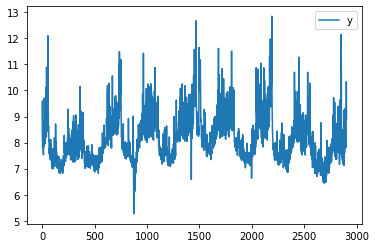

In [10]:
df.plot()

In [11]:
df.dtypes

ds     object
y     float64
dtype: object

In [12]:
!pip install matplotlib

You should consider upgrading via the 'D:\Python310\Scripts\Notebooks\ve\Scripts\python.exe -m pip install --upgrade pip' command.


In [ ]:
!pip inatall pandas

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2905 entries, 0 to 2904
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ds      2905 non-null   object 
 1   y       2905 non-null   float64
dtypes: float64(1), object(1)
memory usage: 45.5+ KB


In [14]:
df['date'] = pd.to_datetime(df['ds'])

In [16]:
df.dtypes

ds              object
y              float64
date    datetime64[ns]
dtype: object

In [17]:
time = df['date']

<AxesSubplot:>

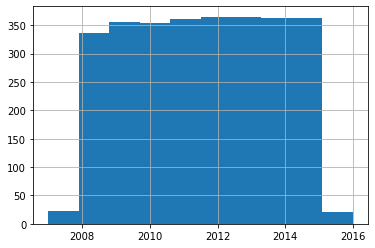

In [20]:
time.dt.year.hist()

<AxesSubplot:>

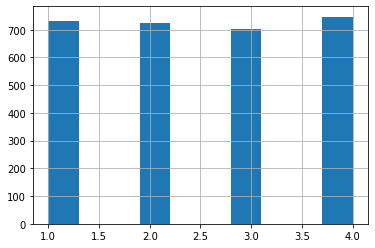

In [22]:
time.dt.quarter.hist()

<AxesSubplot:>

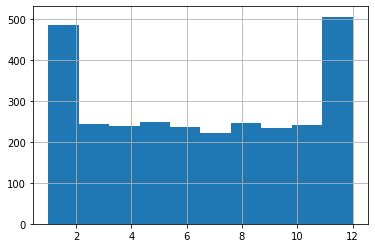

In [24]:
time.dt.month.hist()

C:\Users\st\AppData\Local\Temp\ipykernel_9608\2562023697.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  time.dt.week.hist()


<AxesSubplot:>

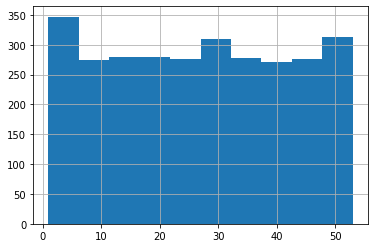

In [25]:
time.dt.week.hist()

<AxesSubplot:>

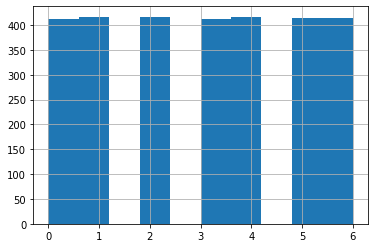

In [27]:
time.dt.weekday.hist()

<AxesSubplot:>

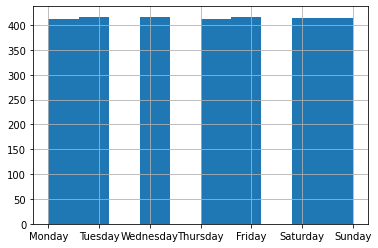

In [31]:
time.dt.day_name().hist()

In [32]:
time.dt.hour.value_counts()

0    2905
Name: date, dtype: int64

<AxesSubplot:>

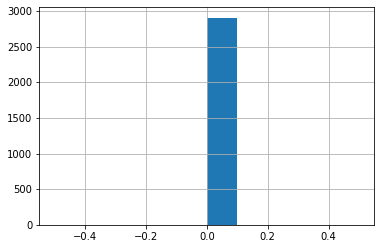

In [33]:
time.dt.hour.hist()

In [34]:
value = df['y']

<AxesSubplot:>

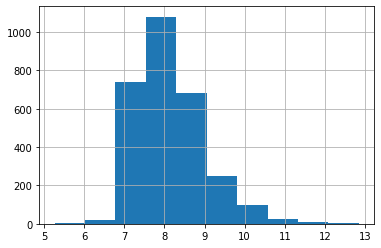

In [35]:
value.hist()

In [36]:
cd = df.copy()

In [37]:
cd.index

RangeIndex(start=0, stop=2905, step=1)

In [38]:
cd.columns

Index(['ds', 'y', 'date'], dtype='object')

In [39]:
cd.index = cd['date']

In [43]:
cd.drop(['ds', 'date'], axis=1, inplace=True)

<AxesSubplot:xlabel='date'>

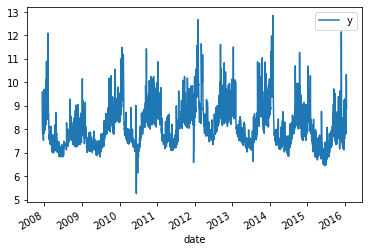

In [45]:
cd.plot()

In [49]:
diff_time = time.diff(1).dropna()

In [50]:
diff_time

1      1 days
2      1 days
3      1 days
4      1 days
5      1 days
        ...  
2900   1 days
2901   1 days
2902   1 days
2903   1 days
2904   1 days
Name: date, Length: 2904, dtype: timedelta64[ns]

In [52]:
diff_time.value_counts()

1 days     2875
2 days       20
3 days        5
4 days        2
20 days       1
5 days        1
Name: date, dtype: int64

<AxesSubplot:>

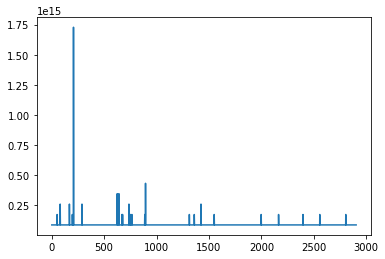

In [57]:
diff_time.plot()

In [62]:
dy = cd.diff(1).fillna(0)

<AxesSubplot:xlabel='date'>

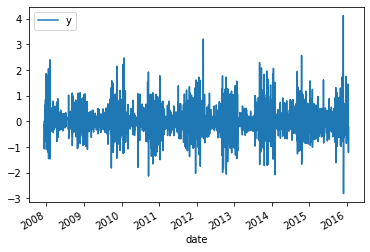

In [64]:
dy.plot()

In [65]:
dy.mean()

y   -0.000241
dtype: float64

In [68]:
dy.std()

y    0.48998
dtype: float64

array([[<AxesSubplot:title={'center':'y'}>]], dtype=object)

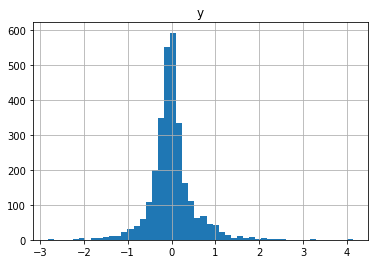

In [71]:
dy.hist(bins=50)

<AxesSubplot:xlabel='date'>

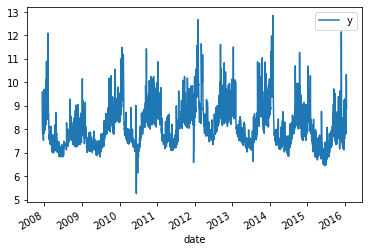

In [76]:
cd.plot()

In [90]:
import matplotlib.pyplot as plt

In [102]:
period = 7 #days
period = 30 #days
period = 3*30 #days
period = 365 #days
period = 2*365 #days

In [103]:
rd = cd.rolling(period).mean().dropna()

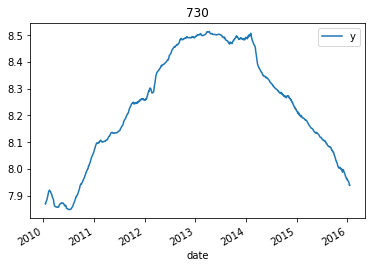

In [104]:
rd.plot()
plt.title(period);

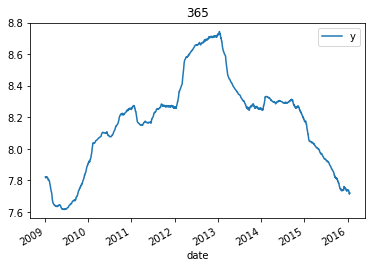

In [101]:
rd.plot()
plt.title(period);

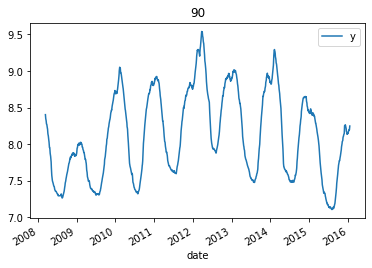

In [98]:
rd.plot()
plt.title(period);

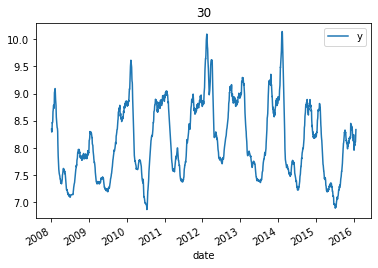

In [95]:
rd.plot()
plt.title(period);

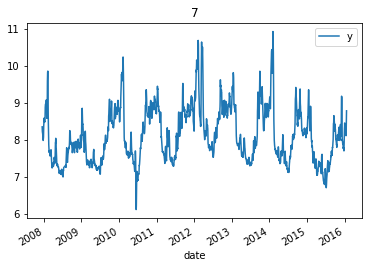

In [92]:
rd.plot()
plt.title(period);

In [105]:
period = 30 #days

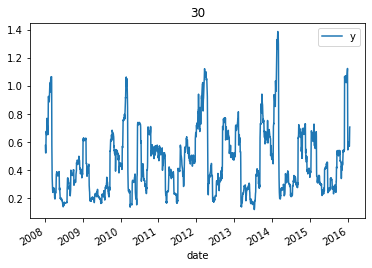

In [106]:
rd = cd.rolling(period).std().dropna()
rd.plot()
plt.title(period);

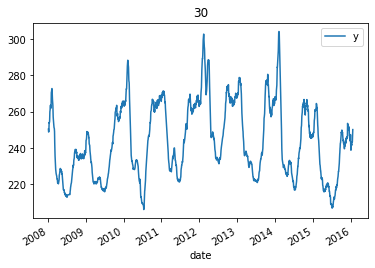

In [107]:
rd = cd.rolling(period).sum().dropna()
rd.plot()
plt.title(period);

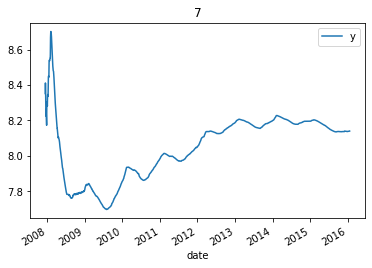

In [108]:
ed = cd.expanding(7).mean()
ed.plot()
plt.title(7);

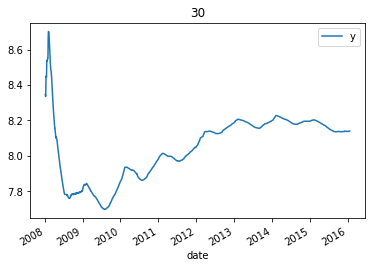

In [109]:
ed = cd.expanding(30).mean()
ed.plot()
plt.title(30);

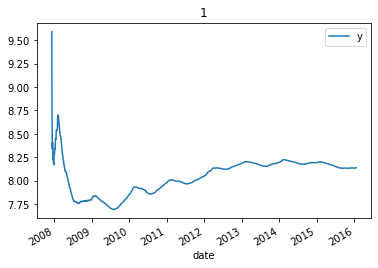

In [110]:
ed = cd.expanding(1).mean()
ed.plot()
plt.title(1);